In [183]:
import pandas as pd
import snscrape.modules.twitter as sntwitter

In [184]:
AMOUNT_OF_TWEETS = 100

scraper_before_fame = sntwitter.TwitterSearchScraper('Andrew Tate lang:en since:2022-01-01 until:2022-01-07')
scraper_while_controversy = sntwitter.TwitterSearchScraper('Andrew Tate lang:en since:2022-08-21 until:2022-08-27')
scraper_after_arrest = sntwitter.TwitterSearchScraper('Andrew Tate lang:en')

sntwitter.TwitterTweetScraper('Andrew Tate').get_items()

tweets_before_fame = []
tweets_while_controversy = []
tweets_after_arrest = []

for i,tweet in enumerate(scraper_before_fame.get_items()):
    tweet_data = {
        "id": tweet.id,
        "content": tweet.rawContent,
    }
    tweets_before_fame.append(tweet_data)
    if i > AMOUNT_OF_TWEETS:
        break

for i,tweet in enumerate(scraper_while_controversy.get_items()):
    tweet_data = {
        "id": tweet.id,
        "content": tweet.rawContent,
    }
    tweets_while_controversy.append(tweet_data)
    if i > AMOUNT_OF_TWEETS:
        break

for i,tweet in enumerate(scraper_after_arrest.get_items()):
    tweet_data = {
        "id": tweet.id,
        "content": tweet.rawContent,
    }
    tweets_after_arrest.append(tweet_data)
    if i > AMOUNT_OF_TWEETS:
        break

print(tweets_before_fame)
print(tweets_while_controversy)
print(tweets_after_arrest)

Unavailable user in card on tweet 1478699262007468035
User 1324742403492892673 not found in user refs in card on tweet 1478699262007468035


[{'id': 1479195575312601088, 'content': '@latimessports @BradyMcCollough He could’ve opted out if he didn’t want to play. Guys did it all over the country'}, {'id': 1479194061340909578, 'content': "Your Mom's House Podcast w/ Andrew Tate - Ep.636 https://t.co/j9etHAg1lR via @YouTube"}, {'id': 1479187334436429825, 'content': '@andrewtate_ @jagalight @WW_Marcus Judge Mental sounds like a British court tv show.'}, {'id': 1479147393815916545, 'content': '@joerogan get Andrew Tate on the podcast asap!'}, {'id': 1479120877652373514, 'content': '@RedditCFB They should suspend the loser'}, {'id': 1479112652429266953, 'content': '@XylieStarGaming Ayy Andrew tate funny dude rich as fuck 😂'}, {'id': 1479105484816728064, 'content': '@davidgodson10 @panther_wakanda @jayythedope 💯 Their interview with Andrew Tate is a must-watch'}, {'id': 1479105443330879489, 'content': '@OmoAlale @panther_wakanda @jayythedope 💯 Their interview with Andrew Tate is a must-watch'}, {'id': 1479062789318750213, 'content

## Tokenizing the tweets

In [185]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [186]:
def tokenize(tweets_list):
    tokenized_tweets = []
    for tweet in tweets_list:
        tokenized_tweet = word_tokenize(tweet["content"])
        tweet_data = {
            "id": tweet["id"],
            "text": tokenized_tweet
        }
        tokenized_tweets.append(tweet_data)
    return tokenized_tweets

## Stopwords filtering every tweet

In [187]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add("https")
stop_words.add("andrew")
stop_words.add("tate")

def stopwords_filter(tweets_list):
    filtered_tweets = []
    for tweet in tweets_list:
        filtered_tweet = [word for word in tweet["text"] if not word.lower() in stop_words and word.isalpha()]
        tweet_data = {
            "id": tweet["id"],
            "text": filtered_tweet
        }
        filtered_tweets.append(tweet_data)
    return filtered_tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\barto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lemmatization of the tweets

In [188]:
from nltk.stem import WordNetLemmatizer

In [189]:
lemmatizer = WordNetLemmatizer()

def lemmatization(tweets_list):
    lemmatized_tweets = []
    for tweet in tweets_list:
        lemmatized_tweet = [lemmatizer.lemmatize(word) for word in tweet["text"]]
        tweet_data = {
            "id": tweet["id"],
            "text": lemmatized_tweet
        }
        lemmatized_tweets.append(tweet_data)
    return lemmatized_tweets

In [190]:
# Before fame
tokenized_tweets_before_fame = tokenize(tweets_before_fame)
filtered_tokenized_tweets_before_fame = stopwords_filter(tokenized_tweets_before_fame)
lemmatized_filtered_tokenized_tokenized_tweets_before_fame = lemmatization(filtered_tokenized_tweets_before_fame)
print(lemmatized_filtered_tokenized_tokenized_tweets_before_fame)
# While controversy
tokenized_tweets_while_controversy = tokenize(tweets_while_controversy)
filtered_tokenized_tweets_while_controversy = stopwords_filter(tokenized_tweets_while_controversy)
lemmatized_filtered_tokenized_tokenized_tweets_while_controversy = lemmatization(filtered_tokenized_tweets_while_controversy)
# After arrest
tokenized_tweets_after_arrest = tokenize(tweets_after_arrest)
filtered_tokenized_tweets_after_arrest = stopwords_filter(tokenized_tweets_after_arrest)
lemmatized_filtered_tokenized_tokenized_tweets_after_arrest = lemmatization(filtered_tokenized_tweets_after_arrest)

[{'id': 1479195575312601088, 'text': ['latimessports', 'BradyMcCollough', 'could', 'opted', 'want', 'play', 'Guys', 'country']}, {'id': 1479194061340909578, 'text': ['Mom', 'House', 'Podcast', 'via', 'YouTube']}, {'id': 1479187334436429825, 'text': ['jagalight', 'Judge', 'Mental', 'sound', 'like', 'British', 'court', 'tv', 'show']}, {'id': 1479147393815916545, 'text': ['joerogan', 'get', 'podcast', 'asap']}, {'id': 1479120877652373514, 'text': ['RedditCFB', 'suspend', 'loser']}, {'id': 1479112652429266953, 'text': ['XylieStarGaming', 'Ayy', 'funny', 'dude', 'rich', 'fuck']}, {'id': 1479105484816728064, 'text': ['jayythedope', 'interview']}, {'id': 1479105443330879489, 'text': ['OmoAlale', 'jayythedope', 'interview']}, {'id': 1479062789318750213, 'text': ['JackSlackMMA', 'appeal', 'sign', 'mailing', 'list', 'become', 'ultimate', 'alpha', 'male']}, {'id': 1479046033300676610, 'text': ['GymRatCrypto', 'John', 'acting', 'like', 'Starting', 'chatting', 'shit', 'conversation', 'John', 'stopp

## Tweet emotion analysis

### Most common words in the tweets

['latimessports', 'BradyMcCollough', 'could', 'opted', 'want', 'play', 'Guys', 'country', 'Mom', 'House', 'Podcast', 'via', 'YouTube', 'jagalight', 'Judge', 'Mental', 'sound', 'like', 'British', 'court', 'tv', 'show', 'joerogan', 'get', 'podcast', 'asap', 'RedditCFB', 'suspend', 'loser', 'XylieStarGaming', 'Ayy', 'funny', 'dude', 'rich', 'fuck', 'jayythedope', 'interview', 'OmoAlale', 'jayythedope', 'interview', 'JackSlackMMA', 'appeal', 'sign', 'mailing', 'list', 'become', 'ultimate', 'alpha', 'male', 'GymRatCrypto', 'John', 'acting', 'like', 'Starting', 'chatting', 'shit', 'conversation', 'John', 'stopped', 'chatting', 'shit', 'kind', 'guy', 'lol', 'legitimacy', 'AliciaMarieBODY', 'aunt', 'called', 'selfish', 'wanting', 'kid', 'paraphrase', 'ancestor', 'survived', 'chased', 'sabertooth', 'tiger', 'amp', 'crazy', 'sh', 'exist', 'repaying', 'ending', 'bloodline', 'kid', 'Happiest', 'people', 'kid', 'day', 'late', 'super', 'busy', 'finally', 'listen', 'LostStories', 'episode', 'LetsNotM

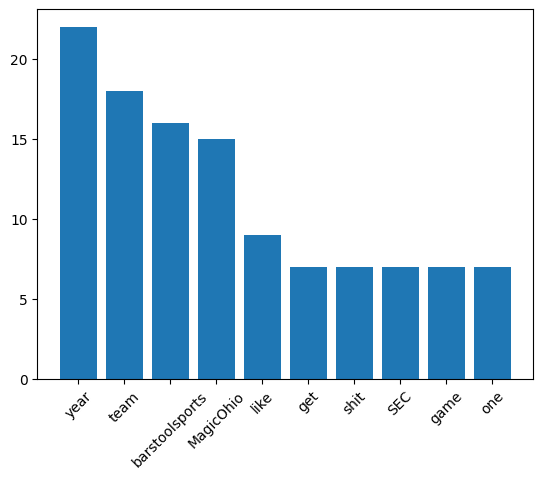

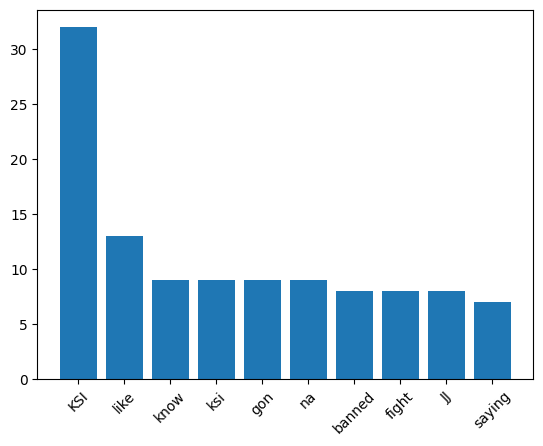

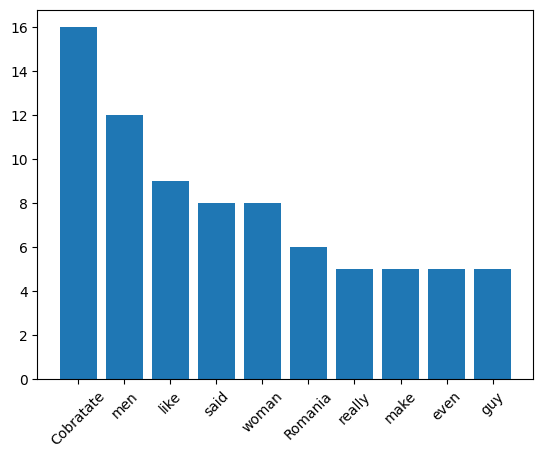

In [191]:
from collections import Counter
import matplotlib.pyplot as plt

# Wektor zliczający słowa
only_words_before_fame = [word for tweet in lemmatized_filtered_tokenized_tokenized_tweets_before_fame for word in tweet["text"]]
word_count_before_fame = Counter(only_words_before_fame)

only_words_while_controversy = [word for tweet in lemmatized_filtered_tokenized_tokenized_tweets_while_controversy for word in tweet["text"]]
word_count_while_controversy = Counter(only_words_while_controversy)

only_words_after_arrest = [word for tweet in lemmatized_filtered_tokenized_tokenized_tweets_after_arrest for word in tweet["text"]]
word_count_after_arrest = Counter(only_words_after_arrest)

top_words = word_count_before_fame.most_common(10)

labels = [word[0] for word in top_words]
values = [word[1] for word in top_words]

plt.bar(labels, values)
plt.xticks(rotation=45)

plt.show()

top_words = word_count_while_controversy.most_common(10)

# Przygotowanie danych do wykresu słupkowego
labels = [word[0] for word in top_words]
values = [word[1] for word in top_words]

# Wykres słupkowy
plt.bar(labels, values)
plt.xticks(rotation=45)

# Wyświetlenie wykresu
plt.show()

top_words = word_count_after_arrest.most_common(10)

# Przygotowanie danych do wykresu słupkowego
labels = [word[0] for word in top_words]
values = [word[1] for word in top_words]

# Wykres słupkowy
plt.bar(labels, values)
plt.xticks(rotation=45)

# Wyświetlenie wykresu
plt.show()


### Emotional analysis based on Vader Sentiment Intensity Analyzer (Positive, Neutral, Negative) and plotting the emotions analysis results

In [192]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

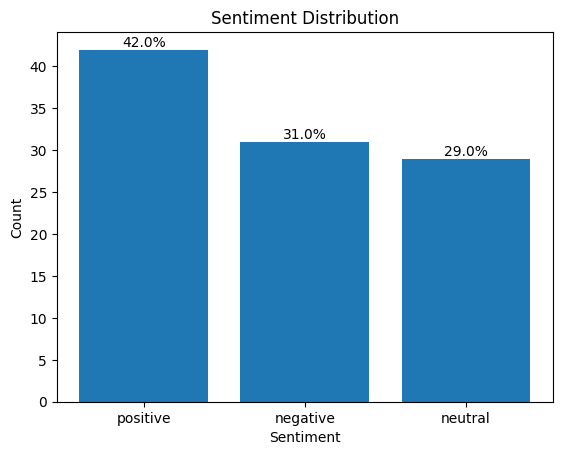

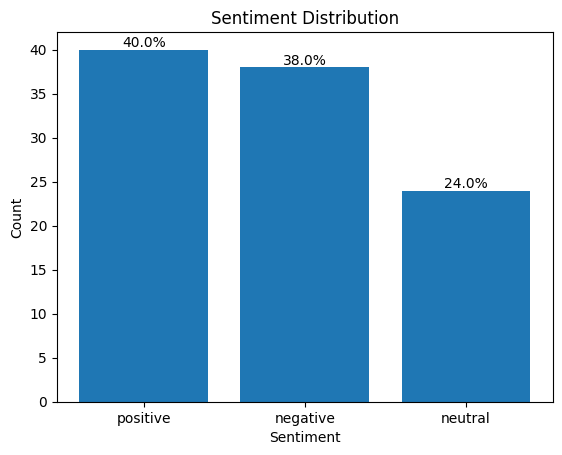

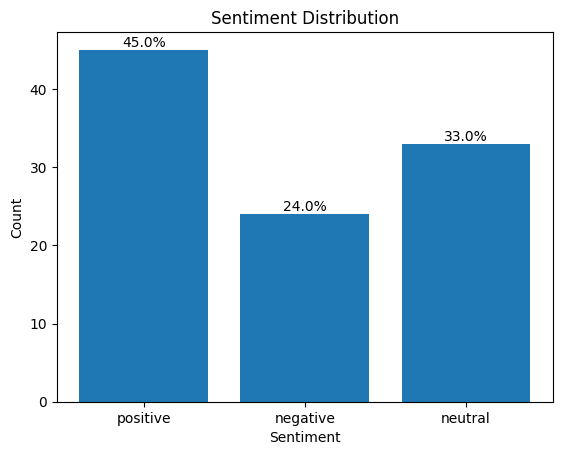

In [193]:
def plot_sentiment_intensity(tweets_list):
    sid = SentimentIntensityAnalyzer()

    positive_tweets = []
    negative_tweets = []
    neutral_tweets = []

    for tweet in tweets_list:
        tweet["sentiment"] = sid.polarity_scores(" ".join(tweet["text"]))
        if tweet["sentiment"]["compound"] > 0:
            positive_tweets.append(tweet)
        elif tweet["sentiment"]["compound"] < 0:
            negative_tweets.append(tweet)
        else:
            neutral_tweets.append(tweet)

    numbers = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
    labels = ['positive', 'negative', 'neutral']

    plt.bar(labels, numbers)
    for i, num in enumerate(numbers):
        percentage = str(round(num/AMOUNT_OF_TWEETS * 100, 2)) + "%"
        plt.text(i, num, percentage, ha='center', va='bottom')

    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')

    plt.show()

plot_sentiment_intensity(lemmatized_filtered_tokenized_tokenized_tweets_before_fame)
plot_sentiment_intensity(lemmatized_filtered_tokenized_tokenized_tweets_while_controversy)
plot_sentiment_intensity(lemmatized_filtered_tokenized_tokenized_tweets_after_arrest)

### Text2Emotion classifier

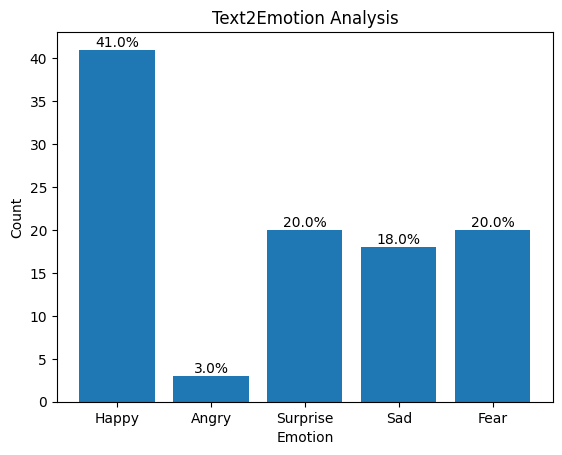

KeyboardInterrupt: 

In [194]:
import text2emotion as te

# emoji 1.6.3

def text2emotion_analysis(tweets_list):
    emotion_results = { "Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0 }
    emotion_tweets = []
    for tweet in tweets_list:
        tweet_emotions = te.get_emotion(" ".join(tweet["text"]))
        dominating_emotion = max(tweet_emotions, key=tweet_emotions.get)
        emotion_results[dominating_emotion] += 1
    
    numbers = [emotion_results["Happy"], emotion_results["Angry"], emotion_results["Surprise"], emotion_results["Sad"], emotion_results["Fear"]]
    labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']

    plt.bar(labels, numbers)
    for i, num in enumerate(numbers):
        percentage = str(round(num/AMOUNT_OF_TWEETS * 100, 1)) + "%"
        plt.text(i, num, percentage, ha='center', va='bottom')

    plt.title('Text2Emotion Analysis')
    plt.xlabel('Emotion')
    plt.ylabel('Count')

    plt.show()

emotion_tweets = text2emotion_analysis(lemmatized_filtered_tokenized_tokenized_tweets_before_fame)
emotion_tweets = text2emotion_analysis(lemmatized_filtered_tokenized_tokenized_tweets_while_controversy)
emotion_tweets = text2emotion_analysis(lemmatized_filtered_tokenized_tokenized_tweets_after_arrest)

### Creating a wordcloud for every time period

In [ ]:
from wordcloud import WordCloud

# Sample text data
text_before_fame = " ".join(only_words_before_fame)
text_while_controversy = " ".join(only_words_while_controversy)
text_after_arrest = " ".join(only_words_after_arrest)

wordcloud = WordCloud().generate(text_before_fame)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

wordcloud = WordCloud().generate(text_while_controversy)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

wordcloud = WordCloud().generate(text_after_arrest)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()
